# (4)  2.3:Complex Machine Learning Models and Keras Part 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
path = r'C:\Users\nvak6\Machine Learning with Python'
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
X = pd.read_csv(os.path.join(path, 'weather_cleaned_date.csv'), index_col=False)

In [8]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

### Wrangling the Data
-Want to narrow down the data to the 2010s

In [11]:
# Reduce observations dataset to 2010's
dfdecade = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.9965,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,7,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0193,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.01

In [13]:
# Reduce answers dataset to 2010's
pleasant_decade = pleasant[(pleasant['DATE'].astype(str).str[:4] >= '2010') & (pleasant['DATE'].astype(str).str[:4] <= '2019')]
pleasant_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
pd.set_option('display.max_rows', None)

In [17]:
# Extract stations list
stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [19]:
# Create a set of unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [21]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
KASSEL: 32868 entries
DEBILT: 32868 entries
MAASTRICHT: 32868 entries
VALENTIA: 32868 entries
MADRID: 32868 entries
DUSSELDORF: 32868 entries
STOCKHOLM: 32868 entries
OSLO: 32868 entries
MUNCHENB: 32868 entries
LJUBLJANA: 32868 entries
BUDAPEST: 32868 entries
BELGRADE: 32868 entries
HEATHROW: 32868 entries
BASEL: 32868 entries
SONNBLICK: 32868 entries


In [23]:
# Drop unnecessary columns
dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [25]:
pleasant_decade.drop(columns = 'DATE', inplace = True)

### Reshaping

In [28]:
X = dfdecade
y = pleasant_decade

In [30]:
# Turn X and y from a df to arrays
X = np.array(X)
y = np.array(y)

### Spliting the Data

In [33]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### Random Forest Model

In [38]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

In [40]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5848849945235487


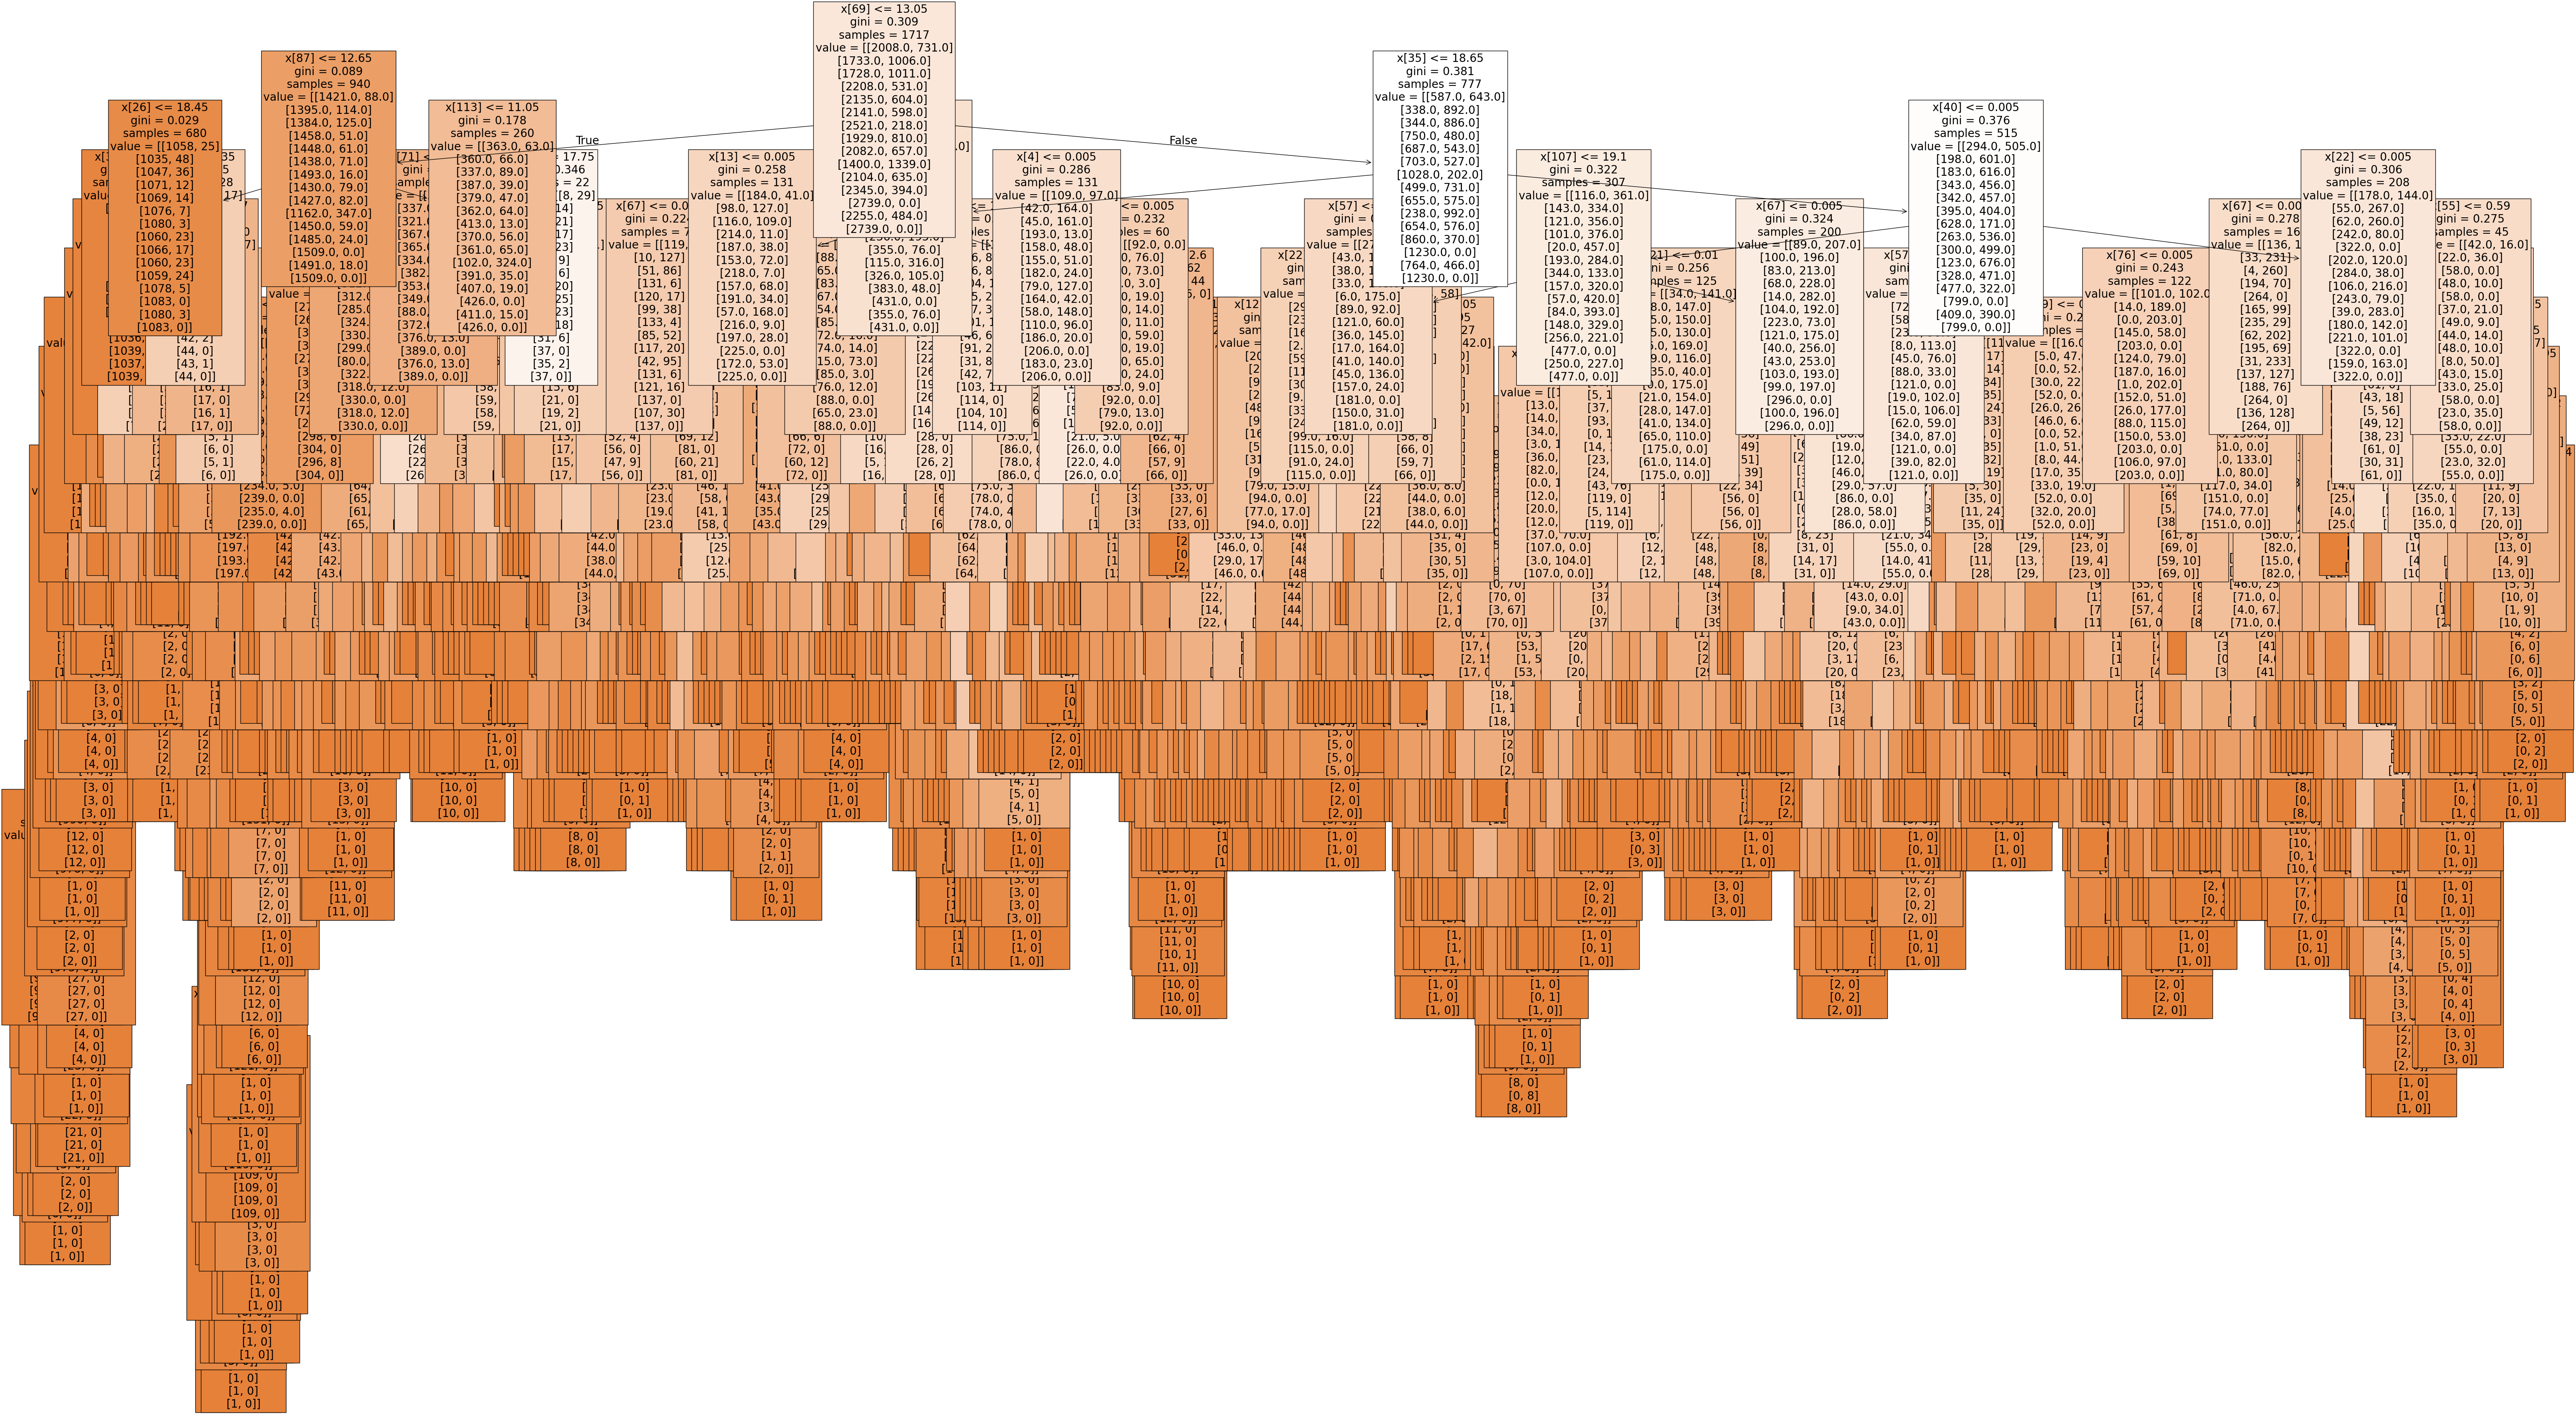

In [45]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [47]:
fig.savefig(os.path.join(path,'random_forest_2010s.png'),bbox_inches='tight')

### Important features

In [49]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([2.67443392e-03, 3.66098171e-03, 3.59206452e-03, 3.61906309e-03,
       1.73192625e-02, 7.69645746e-03, 2.38454451e-02, 3.06521440e-03,
       3.34217167e-02, 3.94953194e-03, 3.65966359e-03, 3.87858404e-03,
       2.80171505e-03, 1.53613969e-02, 2.98224782e-03, 5.45488192e-03,
       3.29088001e-03, 1.27288293e-02, 3.66268374e-04, 0.00000000e+00,
       0.00000000e+00, 1.09628833e-03, 1.48974027e-02, 1.45730644e-03,
       1.12761940e-02, 3.46914138e-03, 2.03401093e-02, 2.01716049e-03,
       2.96845151e-03, 4.03397908e-03, 4.03116058e-03, 1.68247255e-02,
       5.40103300e-03, 1.36247914e-02, 2.81773403e-03, 4.46120061e-02,
       2.53676595e-03, 2.91788711e-03, 5.53679418e-03, 5.14127808e-03,
       2.27415955e-02, 7.86539856e-03, 2.31106976e-02, 5.08021426e-03,
       2.82608308e-02, 2.63132060e-03, 4.38777857e-03, 3.44604946e-03,
       4.33354144e-03, 1.05512837e-02, 4.16539007e-03, 1.57575524e-02,
       3.24214418e-03, 9.18977025e-03, 2.71166337e-03, 2.57615601e-03,
      

In [51]:
# Reshape newarray
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[2.67443392e-03, 3.66098171e-03, 3.59206452e-03, 3.61906309e-03,
         1.73192625e-02, 7.69645746e-03, 2.38454451e-02, 3.06521440e-03,
         3.34217167e-02],
        [3.94953194e-03, 3.65966359e-03, 3.87858404e-03, 2.80171505e-03,
         1.53613969e-02, 2.98224782e-03, 5.45488192e-03, 3.29088001e-03,
         1.27288293e-02],
        [3.66268374e-04, 0.00000000e+00, 0.00000000e+00, 1.09628833e-03,
         1.48974027e-02, 1.45730644e-03, 1.12761940e-02, 3.46914138e-03,
         2.03401093e-02],
        [2.01716049e-03, 2.96845151e-03, 4.03397908e-03, 4.03116058e-03,
         1.68247255e-02, 5.40103300e-03, 1.36247914e-02, 2.81773403e-03,
         4.46120061e-02],
        [2.53676595e-03, 2.91788711e-03, 5.53679418e-03, 5.14127808e-03,
         2.27415955e-02, 7.86539856e-03, 2.31106976e-02, 5.08021426e-03,
         2.82608308e-02],
        [2.63132060e-03, 4.38777857e-03, 3.44604946e-03, 4.33354144e-03,
         1.05512837e-02, 4.16539007e-03, 1.57575524e-02, 3.24214418

In [53]:
# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09889464, 0.05410773, 0.05290271, 0.09633104, 0.10319146,
       0.05770483, 0.02995284, 0.07801421, 0.10516073, 0.06793297,
       0.10077196, 0.05456037, 0.03543356, 0.0606131 , 0.00442784])

In [55]:
# Convert the set of unique stations to a list
unique_stations_list = list(unique_stations)

In [57]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

MUNCHENB      0.105161
MADRID        0.103191
BUDAPEST      0.100772
KASSEL        0.098895
VALENTIA      0.096331
OSLO          0.078014
LJUBLJANA     0.067933
BASEL         0.060613
DUSSELDORF    0.057705
BELGRADE      0.054560
DEBILT        0.054108
MAASTRICHT    0.052903
HEATHROW      0.035434
STOCKHOLM     0.029953
SONNBLICK     0.004428
dtype: float64

In [59]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['KASSEL', 'DEBILT', 'MAASTRICHT', 'VALENTIA', 'MADRID', 'DUSSELDORF', 'STOCKHOLM', 'OSLO', 'MUNCHENB', 'LJUBLJANA', 'BUDAPEST', 'BELGRADE', 'HEATHROW', 'BASEL', 'SONNBLICK']


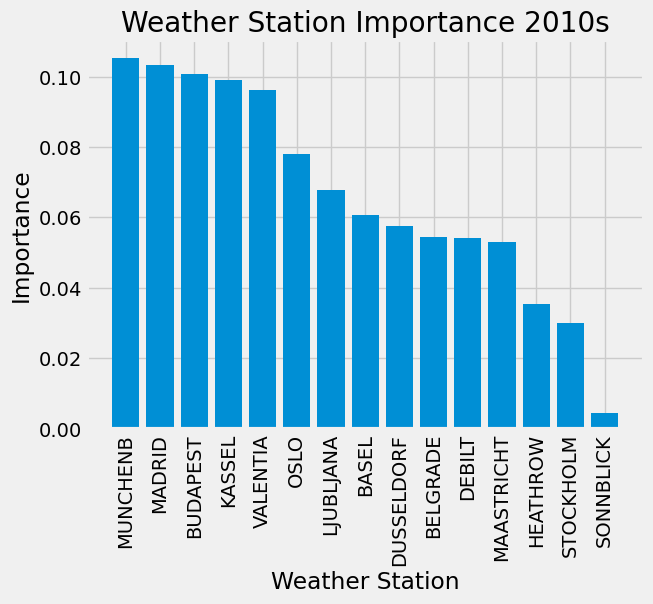

In [61]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.savefig(os.path.join(path,'2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()